In [1]:
from standardInclude import *

Welcome to JupyROOT 6.12/06
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


In [2]:
filePath = "./outputGainSettings/"
settingsByCalo = [[ [] for k in range(54) ] for i in range(24)]

#fin2 = filePath+"calo_settings_run27921.json"
#fin2 = filePath+"calo_run27976.json" #iteration 5
#fin2 = filePath+"calo_run28020.json" #iteration 5
fin2 = filePath+"calo_run28034.json" #iteration 6

with open(fin2) as input_file:
    for i, line in enumerate(input_file):
        if("calo" in line):
            #print(line)
            calo = int(line.split("calo")[1].split('"')[0])
            #print(calo)
        if("sipm" in line):
            sipm = int(line.split('"')[1].split("sipm")[1])
            gain = int(line.split(" ")[9].split("gain:")[1].split(",")[0])
            #if(gain == 20 or gain == 80):
            #    print("****************")
            #    print(calo , sipm, gain, voltage, board, port)
            #    print()
                
            voltage = float(line.split(" ")[10].split(":")[1].split(",")[0])
            board = int(line.split(" ")[11].split(":")[1].split(",")[0])
            port = int(line.split(" ")[12].split(":")[1].split(" ")[0])
            settingsi = [sipm, gain, voltage, board, port]
            
            settingsByCalo[calo - 1][sipm] = settingsi

In [3]:
print(len(settingsByCalo))

24


In [4]:
print(settingsByCalo[0])

[[0, 63, 68.0, 1, 3], [1, 71, 68.2, 3, 8], [2, 56, 68.2, 3, 9], [3, 67, 68.3, 2, 14], [4, 65, 68.3, 2, 15], [5, 60, 68.2, 4, 8], [6, 63, 68.2, 4, 9], [7, 43, 68.0, 1, 14], [8, 66, 68.0, 1, 15], [9, 80, 68.3, 2, 3], [10, 60, 68.2, 3, 6], [11, 62, 68.2, 3, 7], [12, 66, 68.3, 2, 12], [13, 80, 68.3, 2, 13], [14, 74, 68.2, 4, 6], [15, 68, 68.2, 4, 7], [16, 69, 68.0, 1, 12], [17, 49, 68.0, 1, 13], [18, 64, 68.2, 3, 3], [19, 54, 68.2, 3, 4], [20, 58, 68.2, 3, 5], [21, 68, 68.3, 2, 10], [22, 65, 68.3, 2, 11], [23, 58, 68.2, 4, 4], [24, 80, 68.0, 1, 5], [25, 67, 68.0, 1, 10], [26, 64, 68.0, 1, 11], [27, 73, 68.2, 4, 3], [28, 80, 68.2, 3, 14], [29, 66, 68.2, 3, 15], [30, 55, 68.3, 2, 4], [31, 80, 68.0, 1, 2], [32, 56, 68.2, 4, 14], [33, 53, 68.2, 4, 15], [34, 57, 68.0, 1, 4], [35, 46, 68.2, 4, 5], [36, 69, 68.2, 3, 2], [37, 66, 68.2, 3, 12], [38, 80, 68.2, 3, 13], [39, 66, 68.3, 2, 6], [40, 52, 68.3, 2, 7], [41, 55, 68.2, 4, 12], [42, 55, 68.2, 4, 13], [43, 61, 68.0, 1, 6], [44, 60, 68.0, 1, 7],

In [5]:
# Remember that 80s want lower bias voltage and 20s want higher. 
# priority should be towards reducing the number of 20s

In [35]:
def findSwap(calo, xtal, downOrUp = "Down"):
    settingsByXtal = settingsByCalo[calo - 1]
    #print(settingsByXtal)

    for i, (sipm, setting, voltage, number, port) in enumerate(settingsByXtal):
        if(sipm != xtal):
            continue
        #print(calo, sipm, setting)
        takenSwaps = []
        #if(setting == 80):
        if(downOrUp == "Down"):
            #list the number of available crystals with a lower bias voltage
            print("Crystal", i, "with gain setting", setting,", bias voltage", voltage, "on board", number)
            #print("  ->",i, setting, voltage, number)
            optimumCrystal = [999999 for i in range(3)]
            possibleCrystals = []
            possibleCrystalGains = [[0 for j in range(9)] for i in range(6)]
            possibleCrystalGainsLinear = [[0] for i in range(54)]
            for i2, (sipm2, s2, v2, n2, p2) in enumerate(settingsByXtal):
                if(v2 < voltage):
                    #print("      Found a crystal to swap:", i2, s2, v2, n2)
                    possibleCrystals.append(sipm2)
                    possibleCrystalGains[int(np.floor(sipm2/9))][sipm2 % 9] = s2
                    possibleCrystalGainsLinear[sipm2] = [s2, v2, sipm2]
                    if( ( (s2 < optimumCrystal[1] and v2 == optimumCrystal[2] ) or ( (v2 < optimumCrystal[2] ) )) 
                       and sipm2%9 <= sipm%9 
                       and s2 > 34 
                       and (optimumCrystal[0] not in takenSwaps)
                      ):
                        print(v2, optimumCrystal[2], sipm2, s2, v2)
                        optimumCrystal =  [i2, s2, v2, n2]
                takenSwaps = [] #uncomment to remove the no-double rule
                if(i2 == 53 and optimumCrystal[0]< 1000 and (optimumCrystal[0] not in takenSwaps)):
                    takenSwaps.append(optimumCrystal[0])
                    #print(takenSwaps)
                    #numberOf80s += 1
                    #whichXtals.append( (calo,sipm) )
                    print("      optimum crystal (lowest gain):", optimumCrystal)
                    print("      change in bias voltage:", round(voltage - optimumCrystal[2],2))
                    if( ((i%9 < 3) and (i2%9 > 3)) or ((i%9 > 3) and (i2%9 < 3)) ):
                        print("      warning: HDMI cable might be too short")

                    #fig,ax = plt.subplots(figsize=(10,6))
                    #plt.imshow(possibleCrystalGains, origin='lower')  
                    #print(possibleCrystalGains, possibleCrystalGainsLinear)
                    fig, ax = PlotCrystals(possibleCrystalGainsLinear, 30, 10, True, "Calo "+str(calo)+" Xtal "+str(xtal))
                    #plt.colorbar()
                    plt.plot([sipm % 9], [int(np.floor(sipm/9))],"r.",markersize=30)                
                    plt.plot([optimumCrystal[0] % 9], [int(np.floor(optimumCrystal[0]/9))],"y.",marker="*", markersize=30)     
                    plt.savefig("./images/PossibleSwaps_Calo"+str(calo)+"Xtal"+str(xtal)+".png", bbox_inches="tight" )
                    plt.show()


                elif(i2 == 53):
                    print("      unable to optimize")

        #elif(setting == 20):
        elif(downOrUp == "Up"):

            #list the number of available crystals with a lower bias voltage
            print("Crystal", i, "with gain setting", setting,", bias voltage", voltage, "on board", number)
            #print("  ->",i, setting, voltage, number)
            optimumCrystal = [-999999 for i in range(3)]
            possibleCrystals = []
            possibleCrystalGains = [[0 for j in range(9)] for i in range(6)]
            possibleCrystalGainsLinear = [0 for i in range(54)]
            for i2, (sipm2, s2, v2, n2, p2) in enumerate(settingsByXtal):
                if(v2 > voltage):
                    #print("      Found a crystal to swap:", i2, s2, v2, n2)
                    possibleCrystals.append(sipm2)
                    possibleCrystalGains[int(np.floor(sipm2/9))][sipm2 % 9] = s2
                    possibleCrystalGainsLinear[sipm2] = [v2, s2]
                    if( s2 > optimumCrystal[1]):
                        optimumCrystal =  [i2, s2, v2, n2]
                if(i2 == 53 and optimumCrystal[0] > 0):
                    print("      optimum crystal (lowest gain):", optimumCrystal)
                    if( ((i%9 < 3) and (i2%9 > 3)) or ((i%9 > 3) and (i2%9 < 3)) ):
                        print("      warning: HDMI cable might be too short")

                    fig,ax = plt.subplots(figsize=(10,6))
                    #plt.imshow(possibleCrystalGains, origin='lower')     
                    fig, ax = PlotCrystals(possibleCrystalGainsLinear)
                    #plt.colorbar()
                    plt.plot([sipm % 9], [int(np.floor(sipm/9))],"r.")                
                    plt.plot([optimumCrystal[0] % 9], [int(np.floor(optimumCrystal[0]/9))],"b.",marker="*")                
                    plt.show()


                elif(i2 == 53):
                    print("      unable to optimize")
        else:
            Print("error, please specify down or up")

In [36]:
whichXtals = [(1, 9, 33.846153846153854), (1, 13, 67.30769230769232), (1, 46, 40.76923076923077), (2, 36, 45.38461538461538), (2, 45, 34.61538461538462), (2, 47, 71.53846153846153), (3, 13, 30.000000000000004), (3, 27, 30.0), (3, 32, 25.769230769230766), (4, 3, 31.53846153846154), (4, 8, 29.230769230769234), (4, 9, 26.538461538461537), (5, 3, 45.0), (5, 23, 29.615384615384617), (5, 37, 33.84615384615385), (6, 0, 99.23076923076923), (6, 27, 46.53846153846154), (7, 3, 59.99999999999999), (7, 4, 33.07692307692308), (7, 9, 36.36363636363636), (7, 13, 27.692307692307693), (7, 27, 38.07692307692308), (7, 46, 50.38461538461538), (8, 11, 26.923076923076916), (9, 5, 37.692307692307686), (9, 11, 43.07692307692308), (9, 14, 31.53846153846154), (9, 48, 34.54545454545455), (12, 49, 45.769230769230774), (13, 27, 26.153846153846153), (14, 4, 28.076923076923077), (14, 39, 60.769230769230774), (15, 3, 30.0), (16, 2, 53.46153846153846), (16, 36, 35.0), (16, 42, 34.23076923076923), (16, 49, 68.46153846153847), (18, 12, 63.07692307692307), (19, 4, 33.07692307692307), (19, 15, 30.76923076923077), (19, 16, 33.46153846153847), (19, 18, 25.384615384615383), (19, 28, 37.69230769230769), (20, 19, 55.76923076923077), (20, 27, 51.15384615384615), (21, 10, 29.615384615384617), (21, 37, 26.538461538461537), (21, 45, 31.53846153846154), (23, 18, 42.69230769230769), (23, 20, 38.07692307692308), (23, 30, 31.153846153846157), (23, 45, 42.30769230769231), (23, 46, 39.61538461538461), (24, 3, 34.61538461538462), (24, 19, 32.69230769230769), (24, 45, 54.230769230769226)]

Crystal 9 with gain setting 80 , bias voltage 68.3 on board 2
68.0 999999 0 63 68.0
      optimum crystal (lowest gain): [0, 63, 68.0, 1]
      change in bias voltage: 0.3


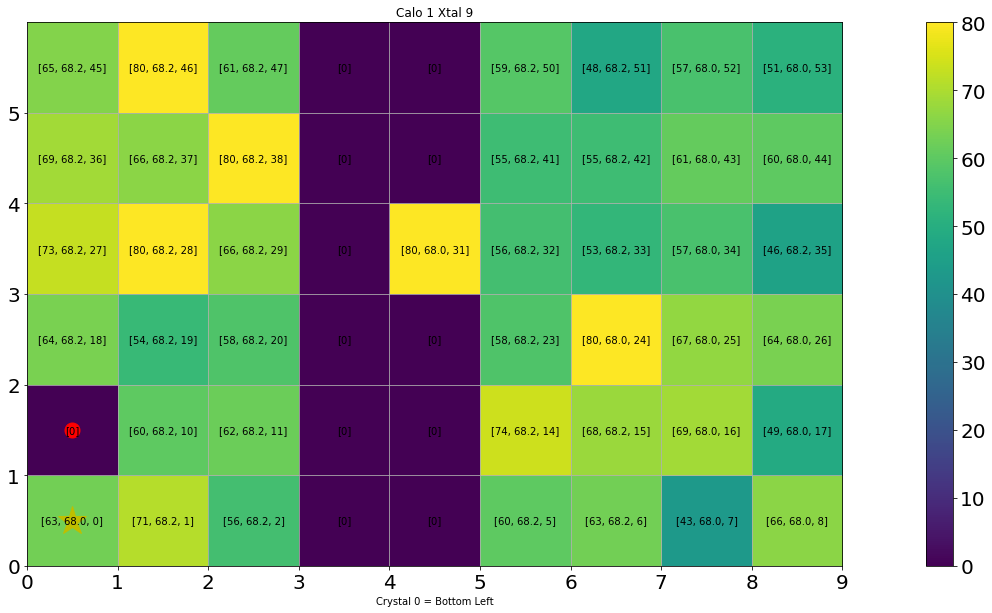

Crystal 13 with gain setting 80 , bias voltage 68.3 on board 2
68.0 999999 0 63 68.0
      optimum crystal (lowest gain): [0, 63, 68.0, 1]
      change in bias voltage: 0.3


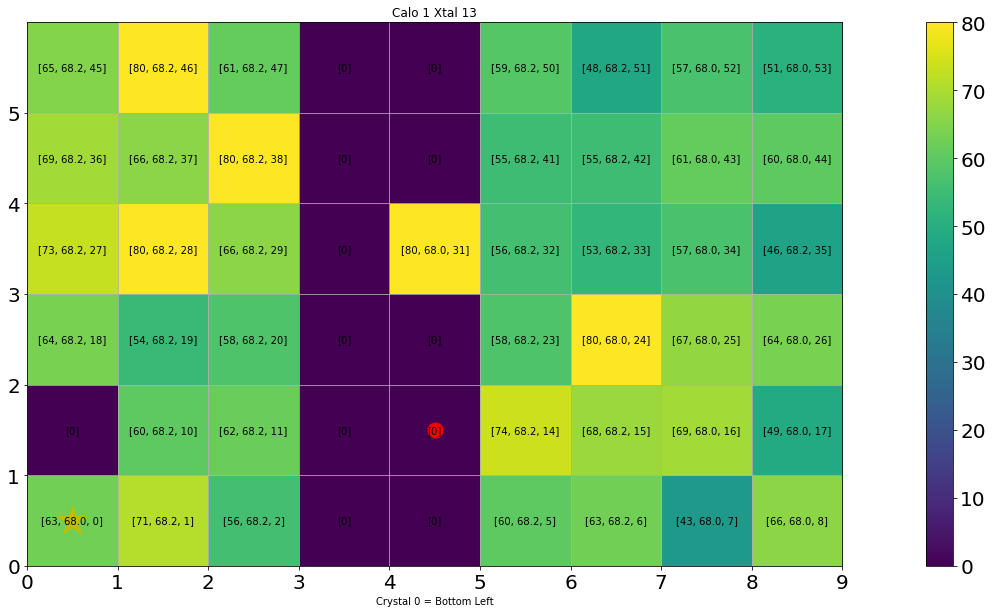

Crystal 46 with gain setting 80 , bias voltage 68.2 on board 3
68.0 999999 0 63 68.0
      optimum crystal (lowest gain): [0, 63, 68.0, 1]
      change in bias voltage: 0.2


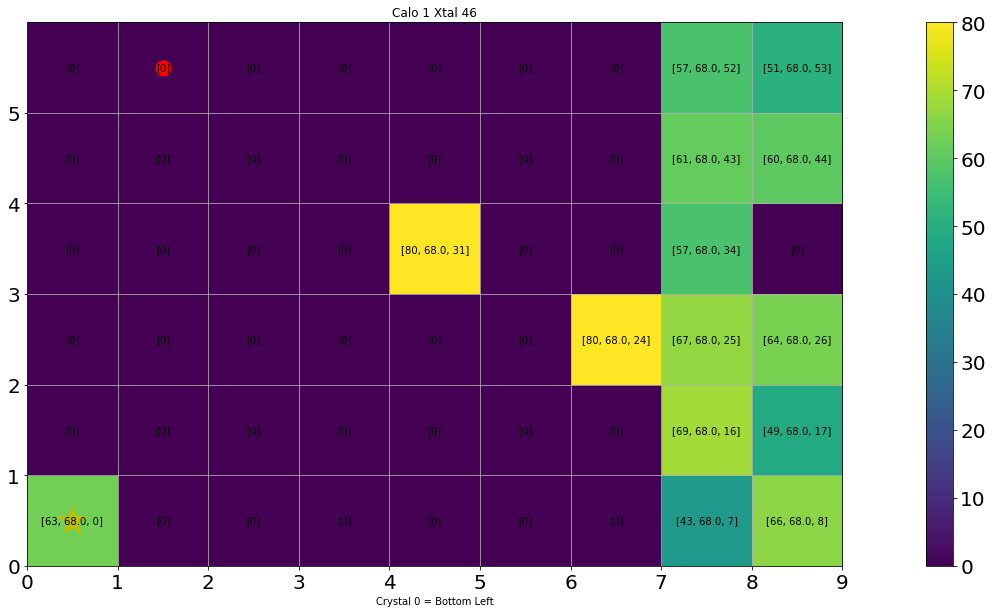

Crystal 36 with gain setting 80 , bias voltage 68.0 on board 3
67.8 999999 0 44 67.8
      optimum crystal (lowest gain): [0, 44, 67.8, 1]
      change in bias voltage: 0.2


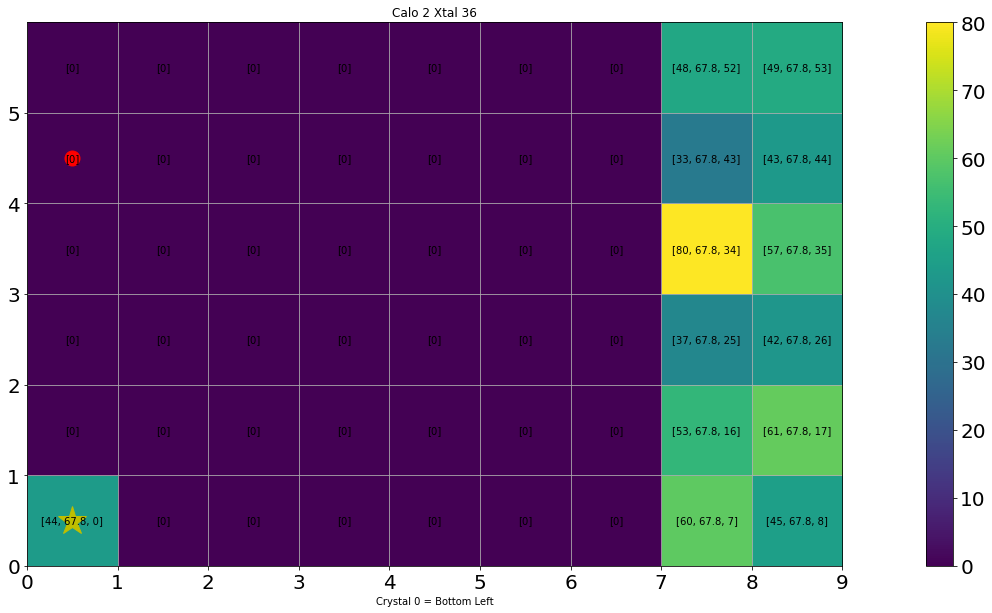

Crystal 45 with gain setting 80 , bias voltage 68.1 on board 4
67.8 999999 0 44 67.8
      optimum crystal (lowest gain): [0, 44, 67.8, 1]
      change in bias voltage: 0.3


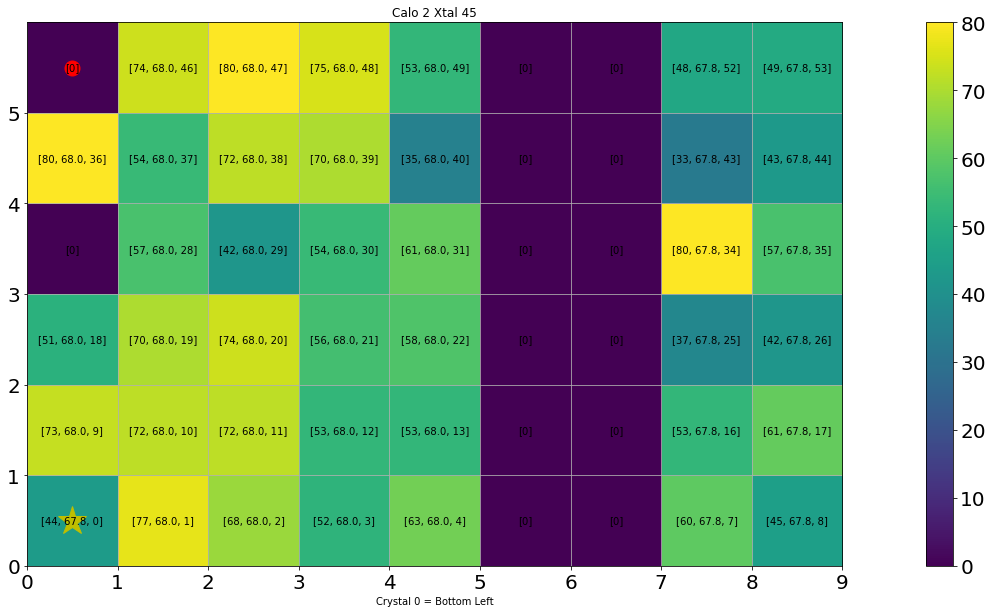

Crystal 47 with gain setting 80 , bias voltage 68.0 on board 3
67.8 999999 0 44 67.8
      optimum crystal (lowest gain): [0, 44, 67.8, 1]
      change in bias voltage: 0.2


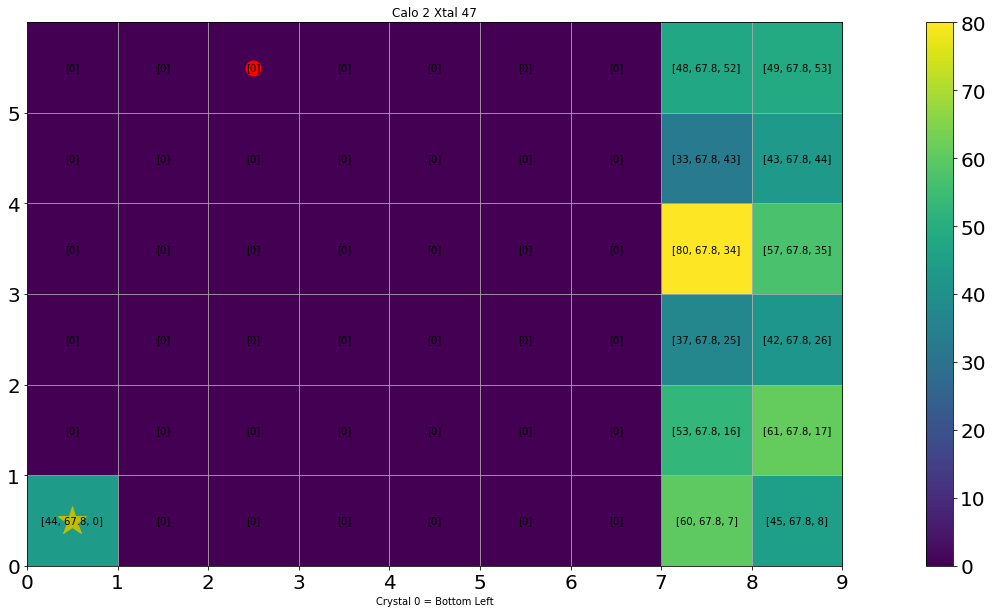

Crystal 13 with gain setting 80 , bias voltage 67.6 on board 3
      unable to optimize
Crystal 27 with gain setting 78 , bias voltage 68.0 on board 4
67.7 999999 0 53 67.7
67.6 67.7 18 51 67.6
      optimum crystal (lowest gain): [18, 51, 67.6, 3]
      change in bias voltage: 0.4


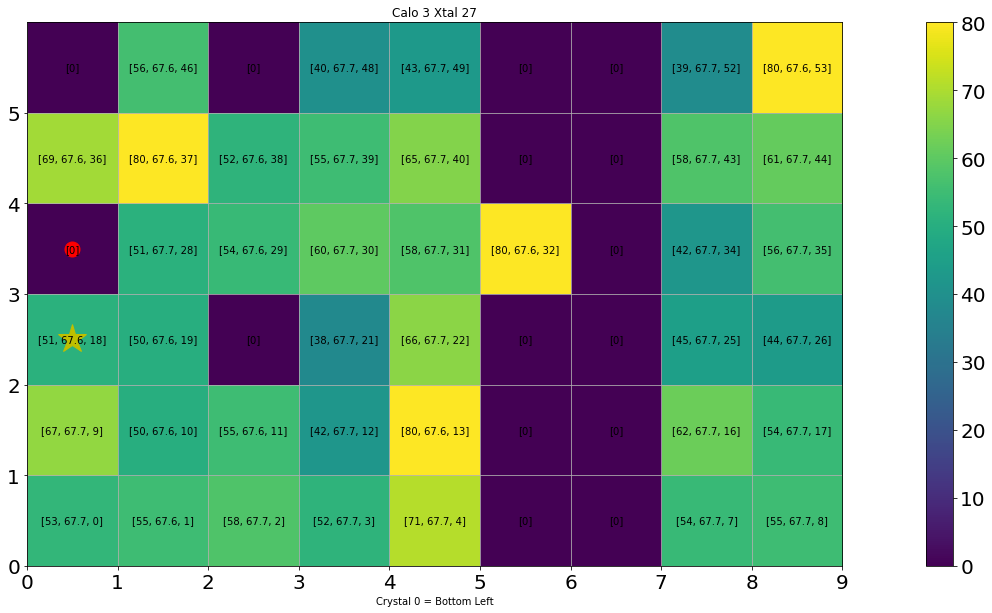

Crystal 32 with gain setting 80 , bias voltage 67.6 on board 3
      unable to optimize
Crystal 3 with gain setting 80 , bias voltage 68.0 on board 2
67.8 999999 1 50 67.8
      optimum crystal (lowest gain): [1, 50, 67.8, 3]
      change in bias voltage: 0.2


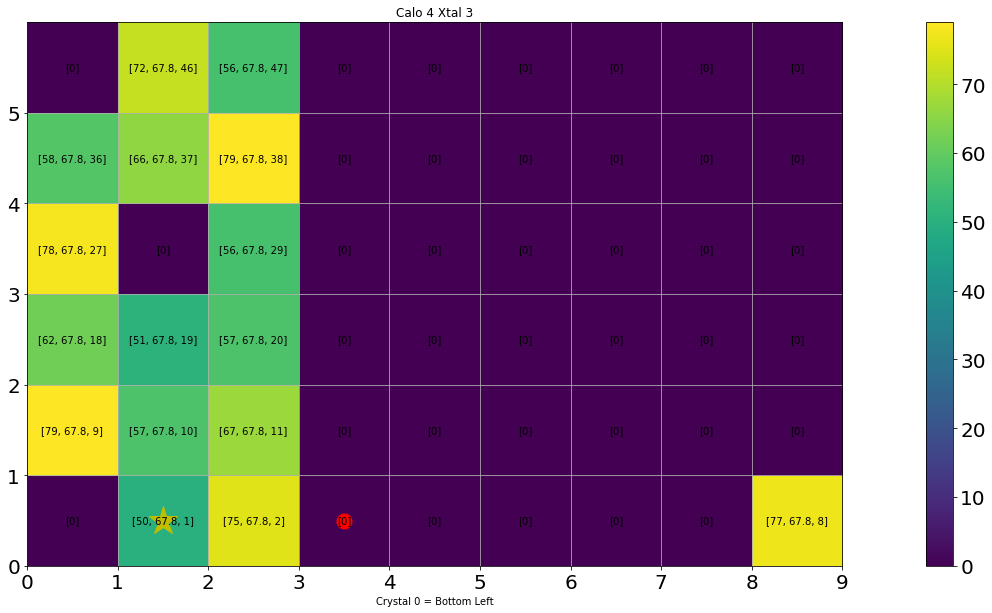

Crystal 8 with gain setting 77 , bias voltage 67.8 on board 3
      unable to optimize
Crystal 9 with gain setting 79 , bias voltage 67.8 on board 3
      unable to optimize
Crystal 3 with gain setting 71 , bias voltage 68.2 on board 2
      unable to optimize
Crystal 23 with gain setting 80 , bias voltage 68.4 on board 4
68.2 999999 0 67 68.2
68.2 68.2 1 58 68.2
68.2 68.2 9 51 68.2
68.2 68.2 22 44 68.2
      optimum crystal (lowest gain): [22, 44, 68.2, 2]
      change in bias voltage: 0.2


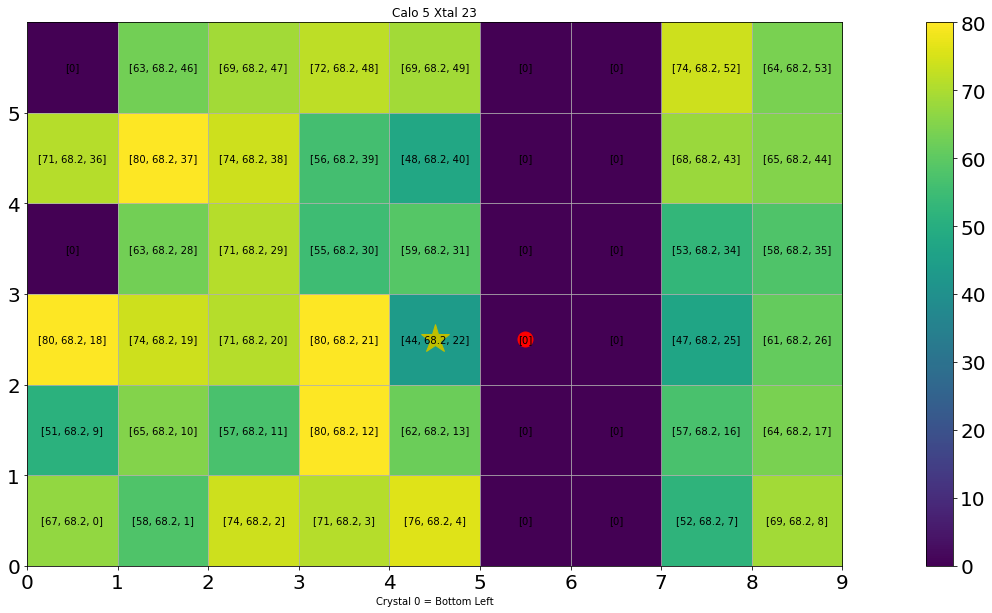

Crystal 37 with gain setting 80 , bias voltage 68.2 on board 3
      unable to optimize
Crystal 0 with gain setting 74 , bias voltage 67.75 on board 1
      unable to optimize
Crystal 27 with gain setting 79 , bias voltage 67.85 on board 4
67.75 999999 0 74 67.75
      optimum crystal (lowest gain): [0, 74, 67.75, 1]
      change in bias voltage: 0.1


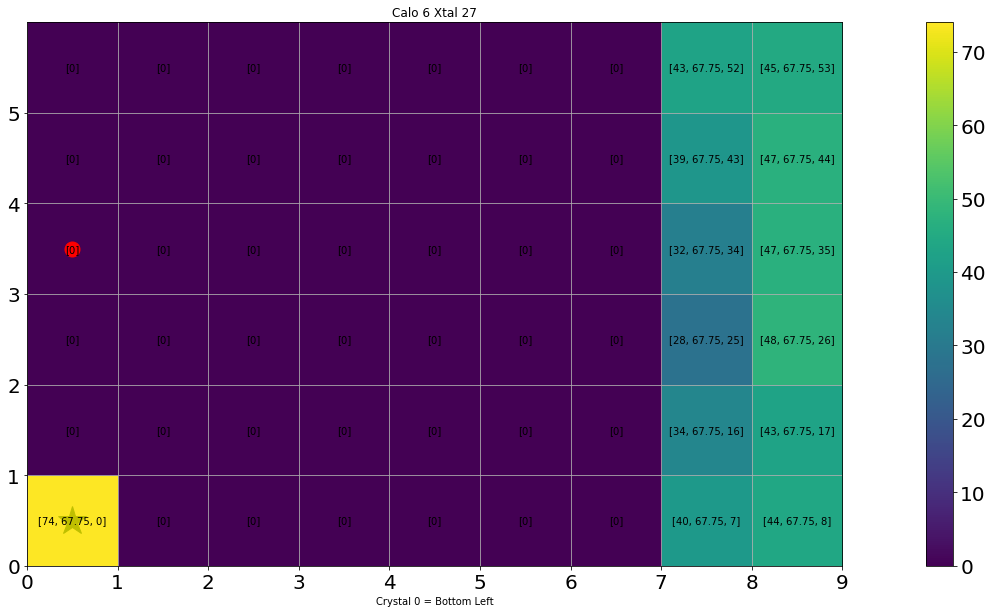

Crystal 3 with gain setting 80 , bias voltage 68.3 on board 2
67.8 999999 0 48 67.8
      optimum crystal (lowest gain): [0, 48, 67.8, 1]
      change in bias voltage: 0.5


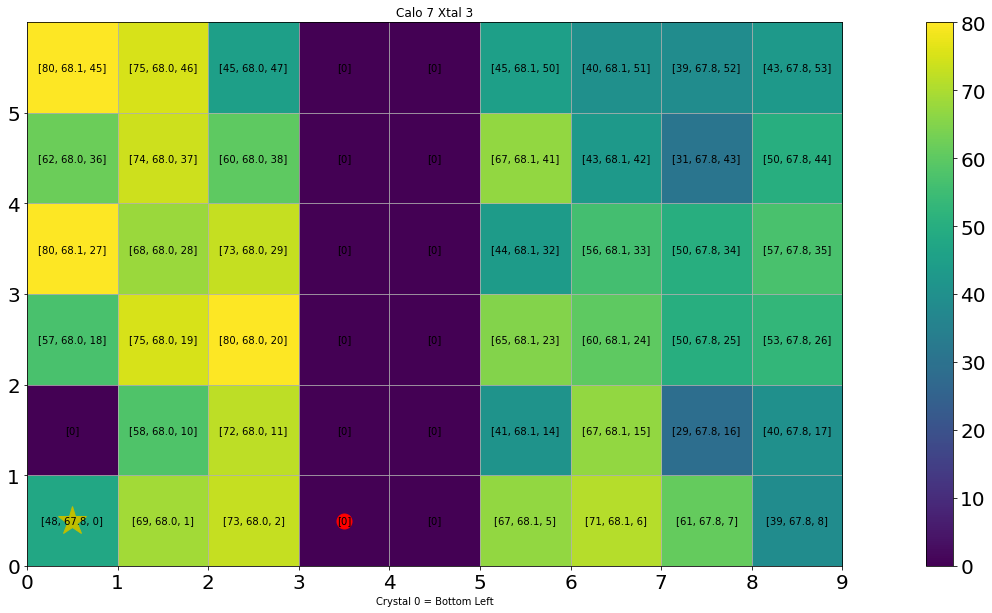

Crystal 4 with gain setting 80 , bias voltage 68.3 on board 2
67.8 999999 0 48 67.8
      optimum crystal (lowest gain): [0, 48, 67.8, 1]
      change in bias voltage: 0.5


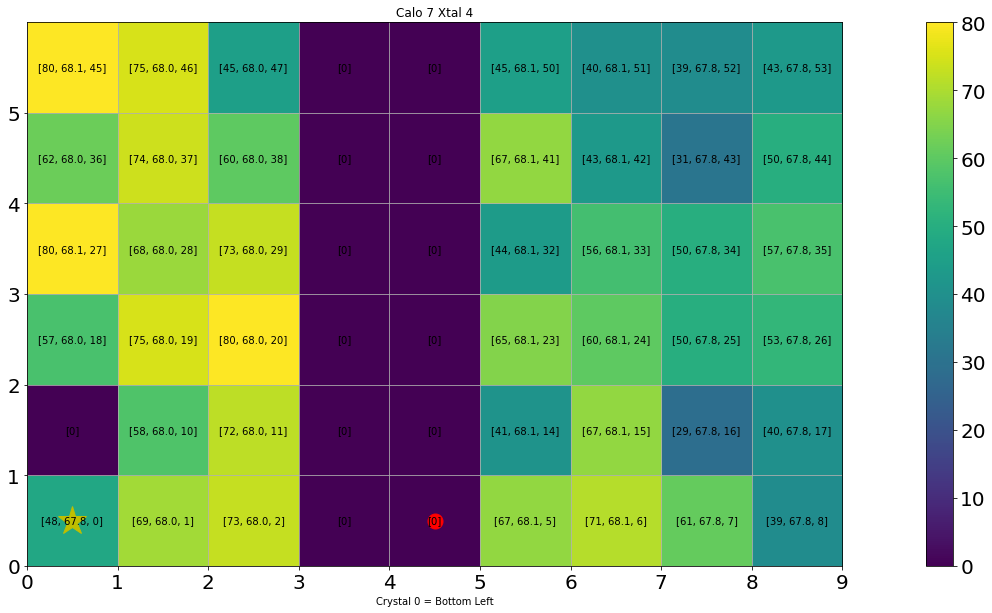

Crystal 9 with gain setting 80 , bias voltage 68.3 on board 2
67.8 999999 0 48 67.8
      optimum crystal (lowest gain): [0, 48, 67.8, 1]
      change in bias voltage: 0.5


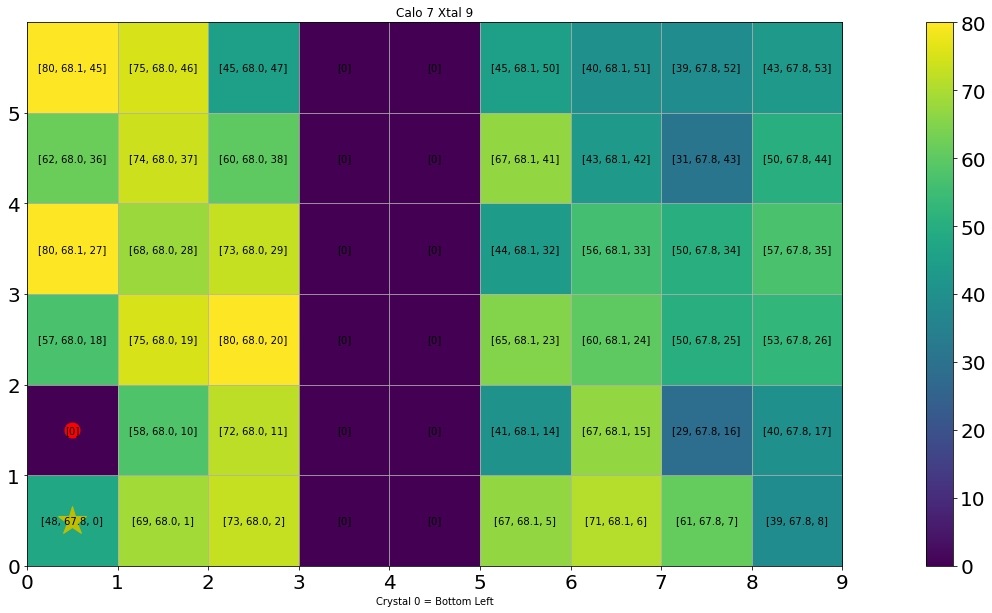

Crystal 13 with gain setting 80 , bias voltage 68.3 on board 2
67.8 999999 0 48 67.8
      optimum crystal (lowest gain): [0, 48, 67.8, 1]
      change in bias voltage: 0.5


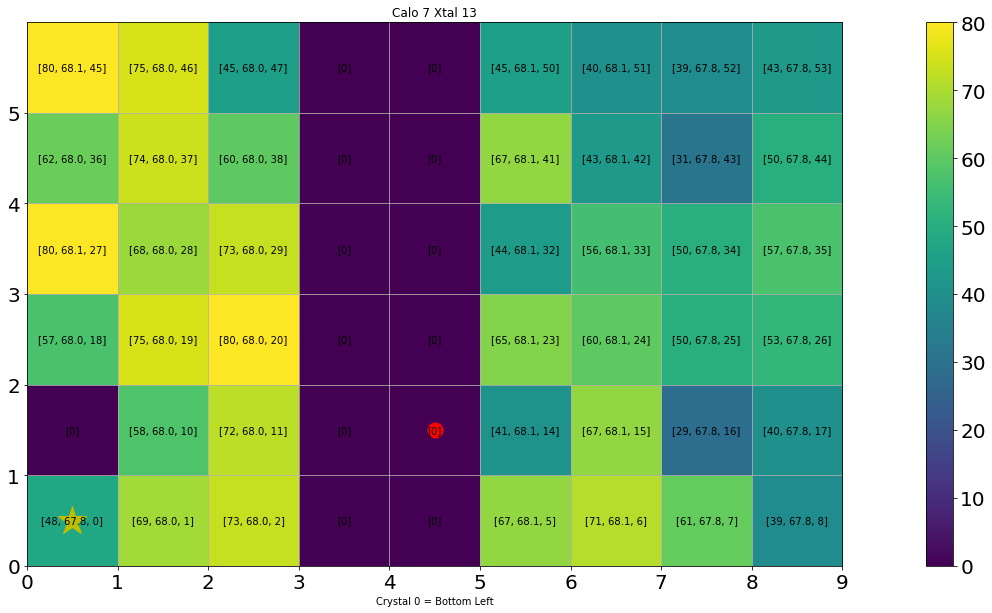

Crystal 27 with gain setting 80 , bias voltage 68.1 on board 4
67.8 999999 0 48 67.8
      optimum crystal (lowest gain): [0, 48, 67.8, 1]
      change in bias voltage: 0.3


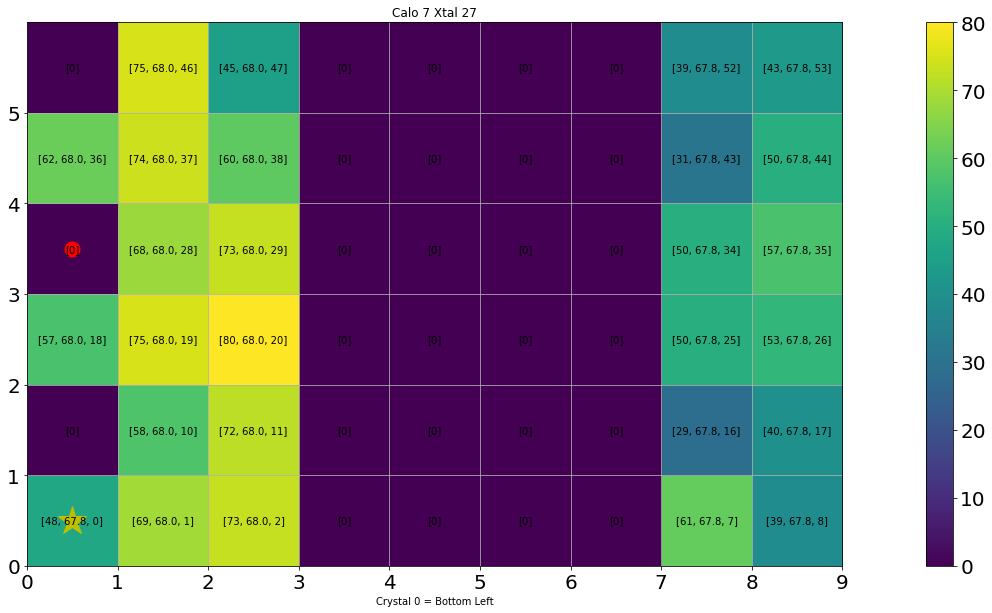

Crystal 46 with gain setting 75 , bias voltage 68.0 on board 3
67.8 999999 0 48 67.8
      optimum crystal (lowest gain): [0, 48, 67.8, 1]
      change in bias voltage: 0.2


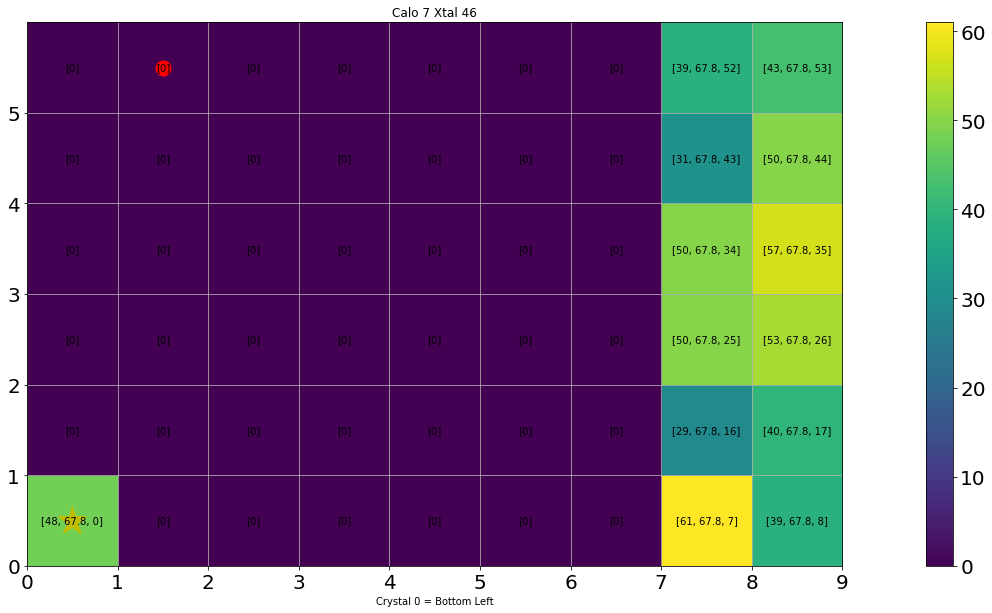

Crystal 11 with gain setting 80 , bias voltage 67.5 on board 3
      unable to optimize
Crystal 5 with gain setting 80 , bias voltage 67.45 on board 4
      unable to optimize
Crystal 11 with gain setting 80 , bias voltage 67.7 on board 3
67.45 999999 27 80 67.45
      optimum crystal (lowest gain): [27, 80, 67.45, 4]
      change in bias voltage: 0.25


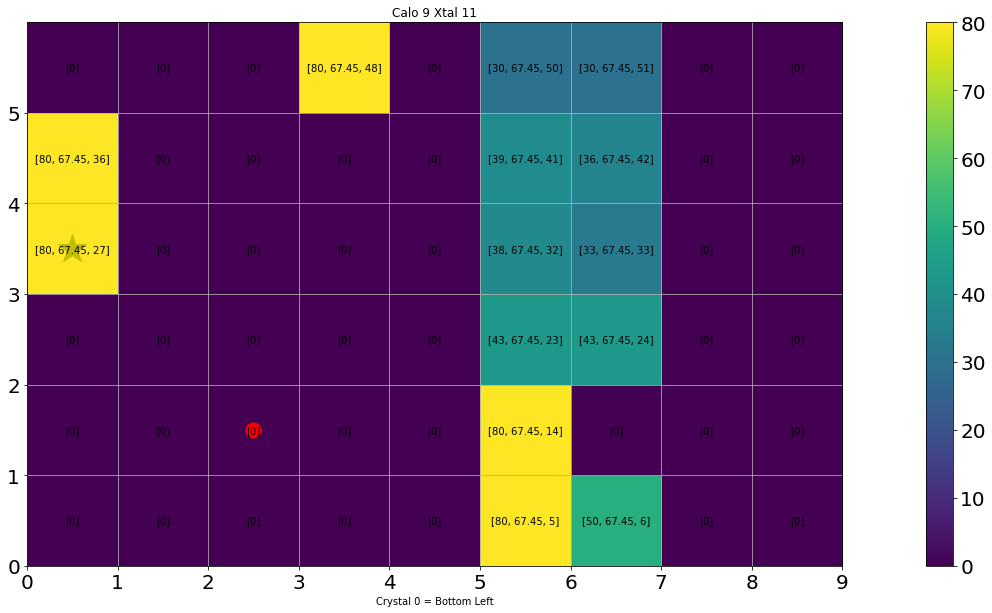

Crystal 14 with gain setting 80 , bias voltage 67.45 on board 4
      unable to optimize
Crystal 48 with gain setting 80 , bias voltage 67.45 on board 4
      unable to optimize
Crystal 49 with gain setting 80 , bias voltage 67.7 on board 2
      unable to optimize
Crystal 27 with gain setting 80 , bias voltage 68.0 on board 4
67.9 999999 0 55 67.9
67.7 67.9 18 50 67.7
      optimum crystal (lowest gain): [18, 50, 67.7, 3]
      change in bias voltage: 0.3


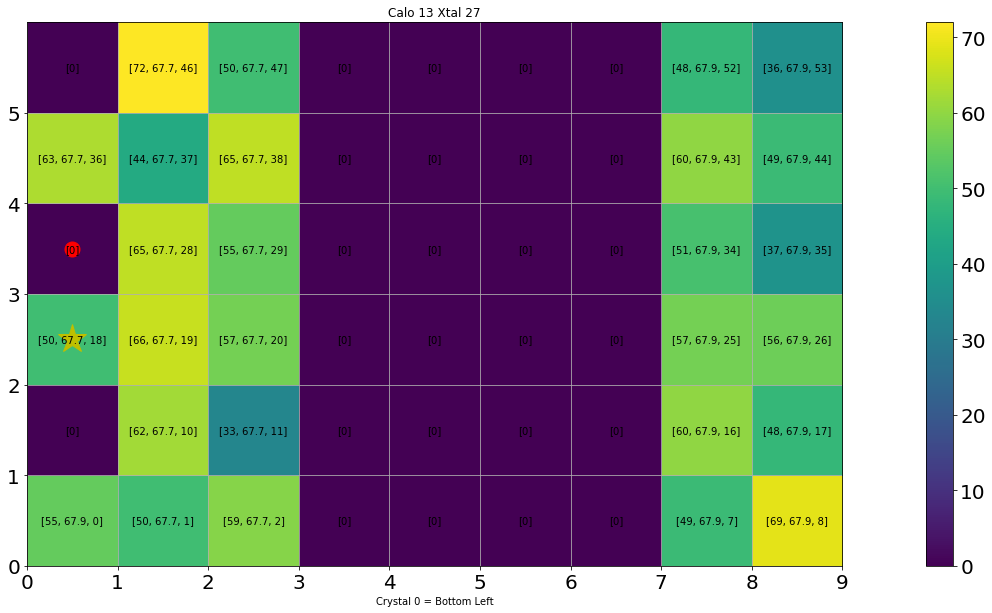

Crystal 4 with gain setting 77 , bias voltage 68.1 on board 2
      unable to optimize
Crystal 39 with gain setting 79 , bias voltage 68.1 on board 2
      unable to optimize
Crystal 3 with gain setting 80 , bias voltage 68.0 on board 2
67.6 999999 1 80 67.6
67.6 67.6 10 72 67.6
67.6 67.6 11 49 67.6
67.6 67.6 37 43 67.6
      optimum crystal (lowest gain): [37, 43, 67.6, 3]
      change in bias voltage: 0.4


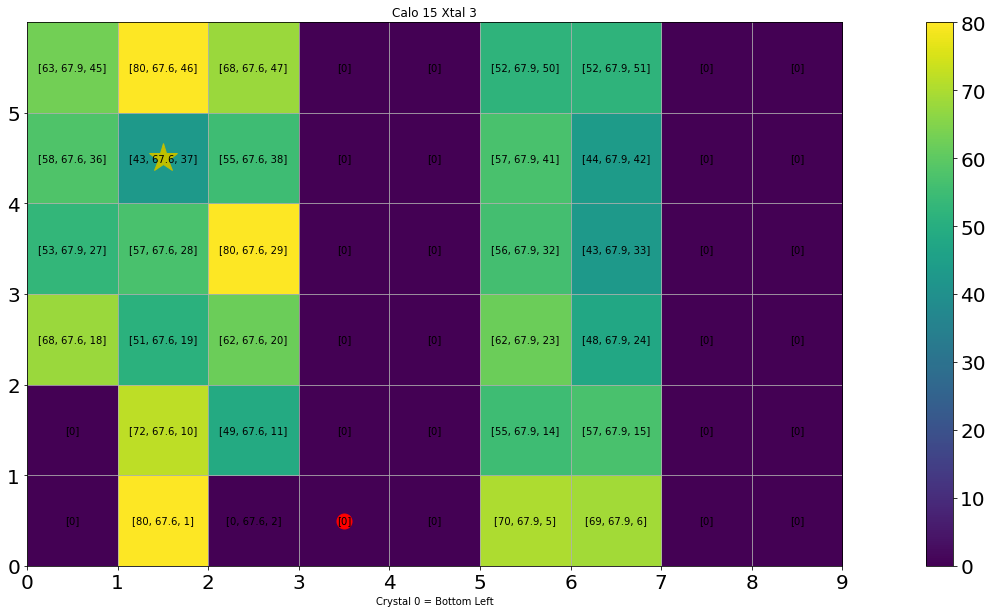

Crystal 2 with gain setting 79 , bias voltage 68.1 on board 3
68.0 999999 9 77 68.0
      optimum crystal (lowest gain): [9, 77, 68.0, 2]
      change in bias voltage: 0.1


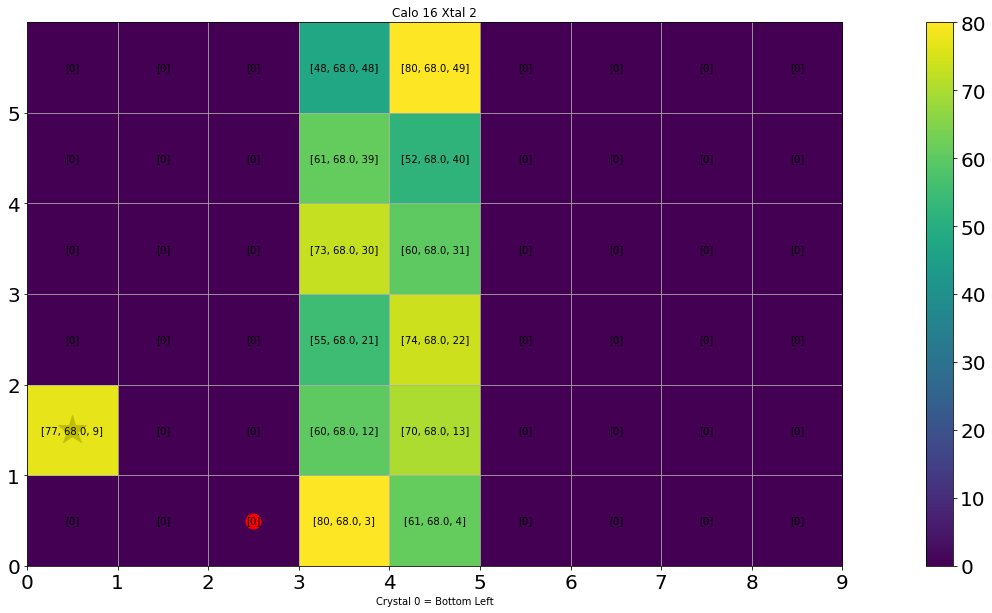

Crystal 36 with gain setting 76 , bias voltage 68.1 on board 3
68.0 999999 9 77 68.0
      optimum crystal (lowest gain): [9, 77, 68.0, 2]
      change in bias voltage: 0.1


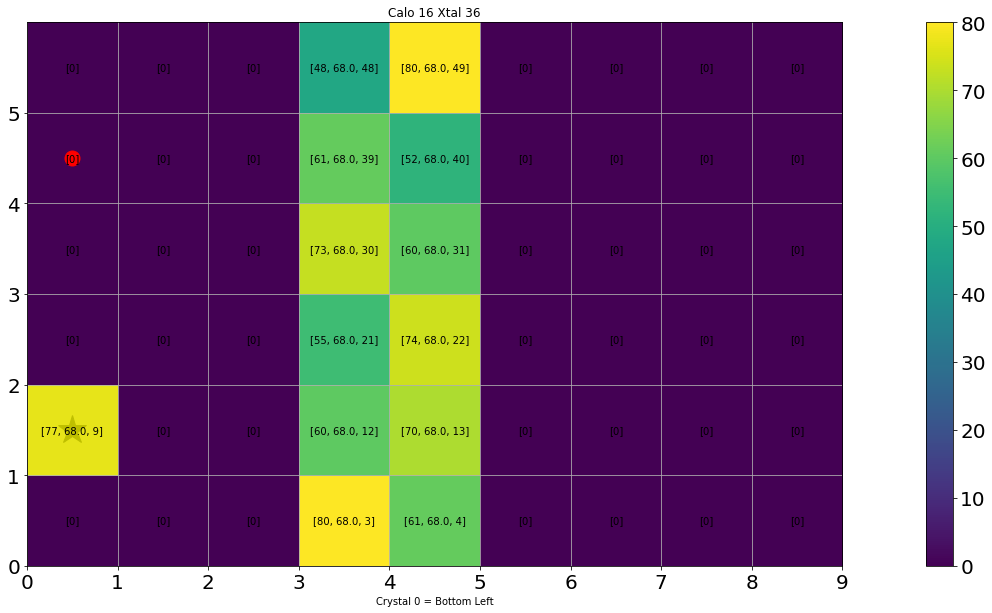

Crystal 42 with gain setting 80 , bias voltage 68.1 on board 4
68.0 999999 3 80 68.0
68.0 68.0 4 61 68.0
68.0 68.0 12 60 68.0
68.0 68.0 21 55 68.0
68.0 68.0 40 52 68.0
68.0 68.0 48 48 68.0
      optimum crystal (lowest gain): [48, 48, 68.0, 2]
      change in bias voltage: 0.1


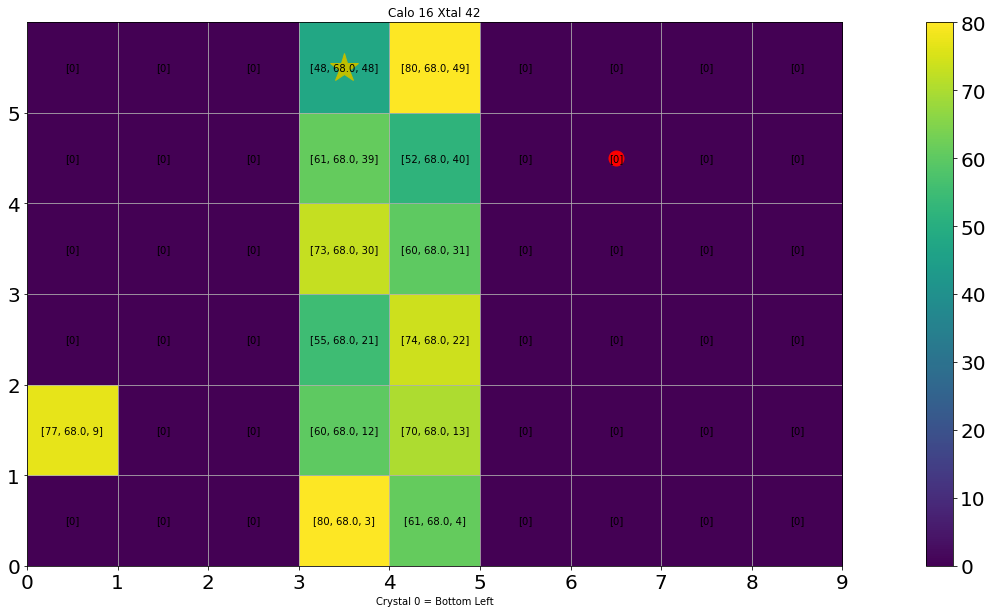

Crystal 49 with gain setting 80 , bias voltage 68.0 on board 2
      unable to optimize
Crystal 12 with gain setting 76 , bias voltage 67.8 on board 2
67.7 999999 1 57 67.7
67.7 67.7 2 44 67.7
67.7 67.7 46 43 67.7
      optimum crystal (lowest gain): [46, 43, 67.7, 3]
      change in bias voltage: 0.1


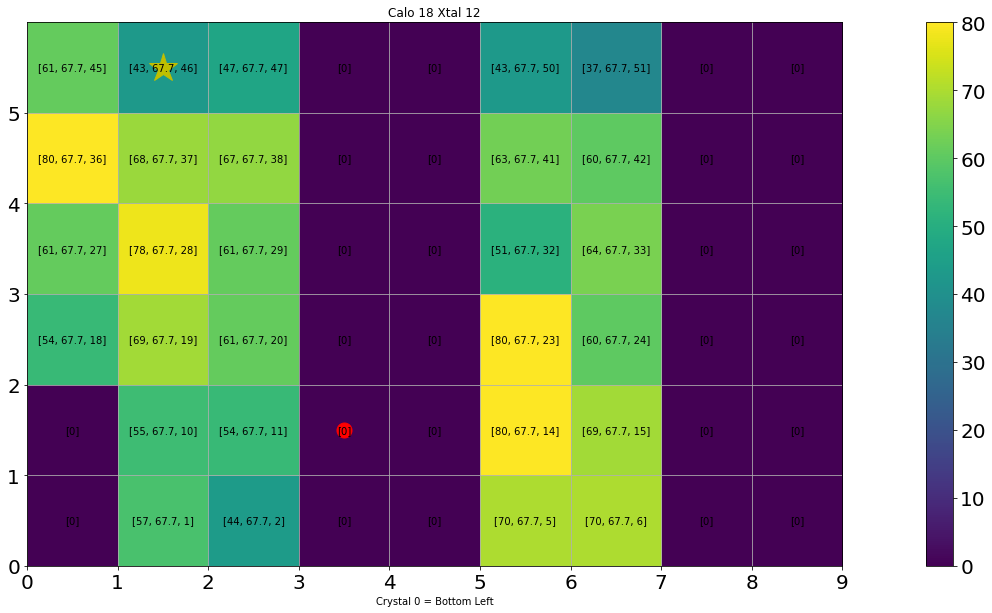

Crystal 4 with gain setting 79 , bias voltage 68.0 on board 2
      unable to optimize
Crystal 15 with gain setting 80 , bias voltage 68.2 on board 4
68.1 999999 0 73 68.1
68.0 68.1 1 70 68.0
68.0 68.0 9 63 68.0
68.0 68.0 19 59 68.0
68.0 68.0 20 49 68.0
68.0 68.0 31 42 68.0
68.0 68.0 46 39 68.0
      optimum crystal (lowest gain): [46, 39, 68.0, 3]
      change in bias voltage: 0.2


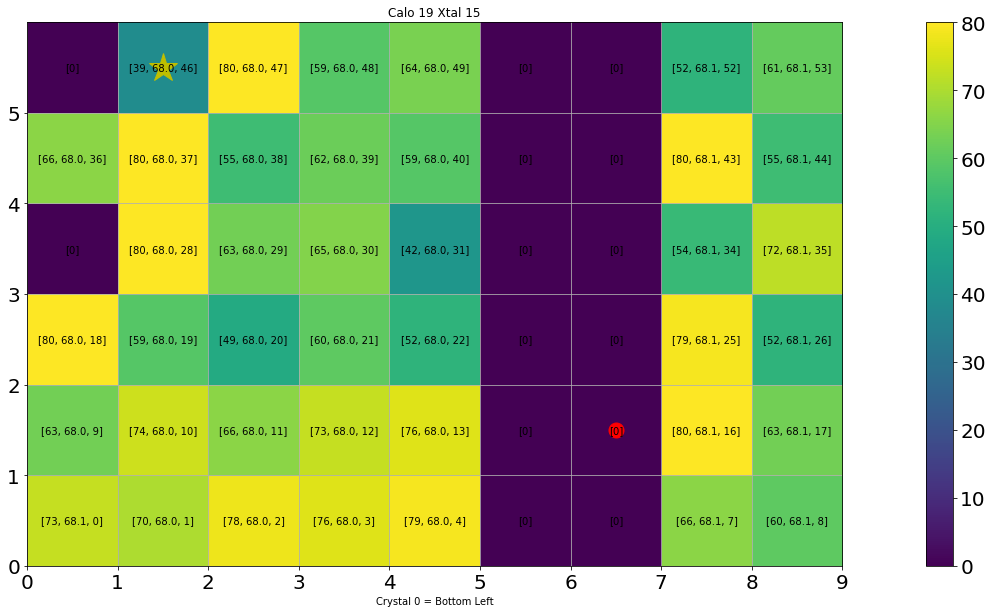

Crystal 16 with gain setting 80 , bias voltage 68.1 on board 1
68.0 999999 1 70 68.0
68.0 68.0 9 63 68.0
68.0 68.0 19 59 68.0
68.0 68.0 20 49 68.0
68.0 68.0 31 42 68.0
68.0 68.0 46 39 68.0
      optimum crystal (lowest gain): [46, 39, 68.0, 3]
      change in bias voltage: 0.1


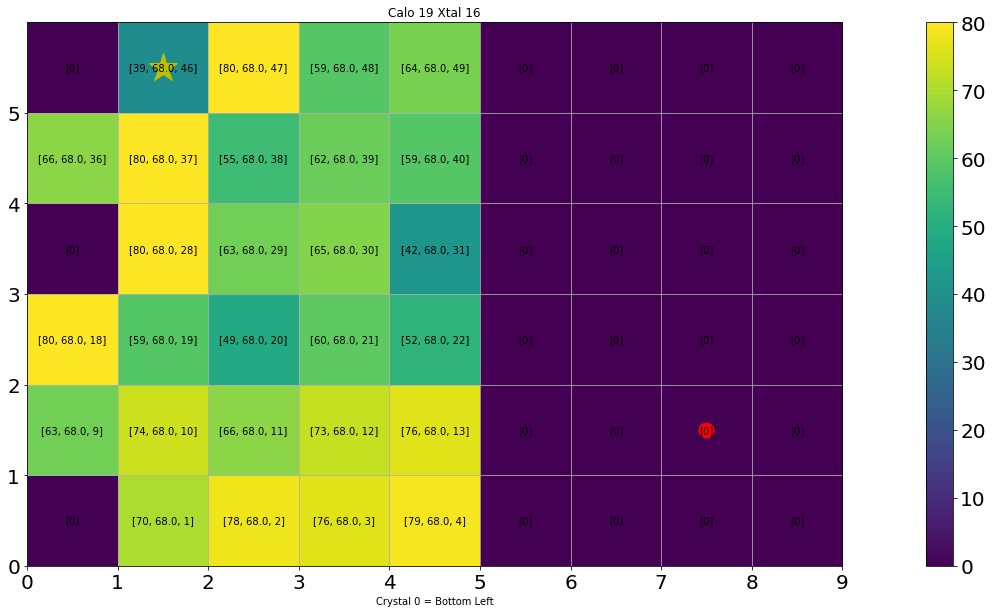

Crystal 18 with gain setting 80 , bias voltage 68.0 on board 3
      unable to optimize
Crystal 28 with gain setting 80 , bias voltage 68.0 on board 3
      unable to optimize
Crystal 19 with gain setting 80 , bias voltage 68.0 on board 3
67.8 999999 0 63 67.8
67.8 67.8 9 58 67.8
      optimum crystal (lowest gain): [9, 58, 67.8, 2]
      change in bias voltage: 0.2


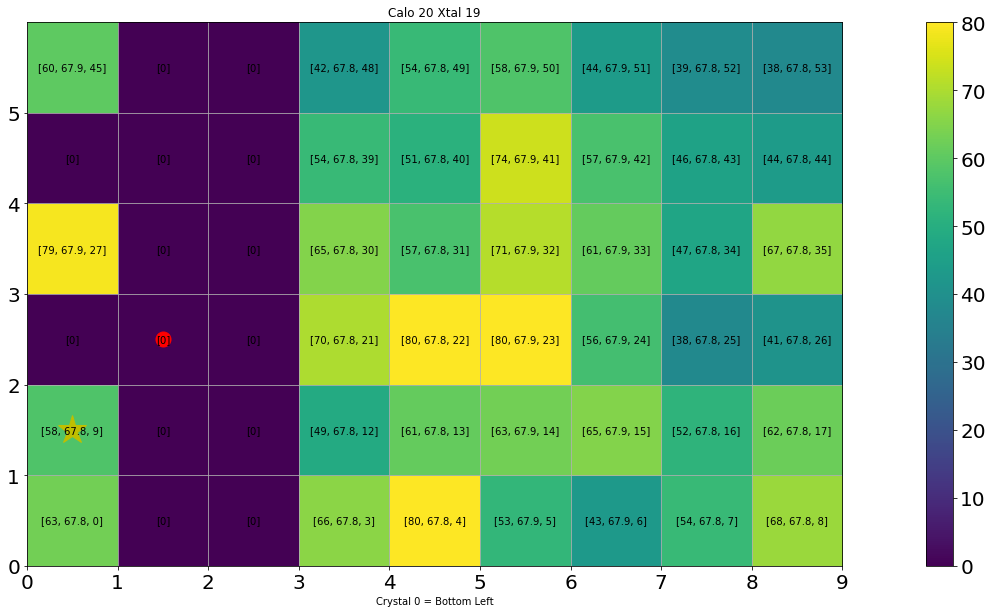

Crystal 27 with gain setting 79 , bias voltage 67.9 on board 4
67.8 999999 0 63 67.8
67.8 67.8 9 58 67.8
      optimum crystal (lowest gain): [9, 58, 67.8, 2]
      change in bias voltage: 0.1


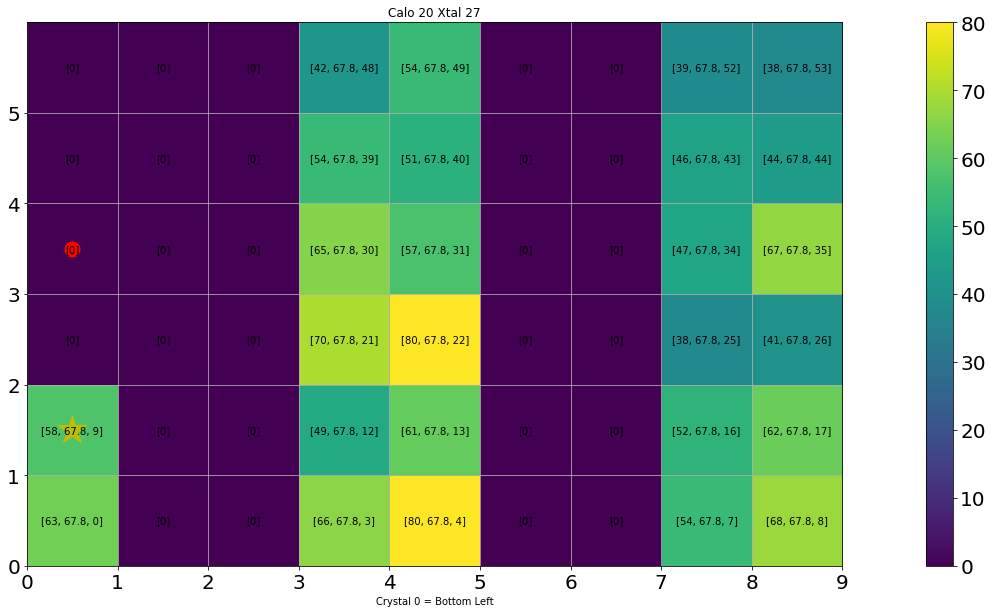

Crystal 10 with gain setting 79 , bias voltage 68.0 on board 3
      unable to optimize
Crystal 37 with gain setting 78 , bias voltage 68.0 on board 3
      unable to optimize
Crystal 45 with gain setting 80 , bias voltage 68.0 on board 4
      unable to optimize
Crystal 18 with gain setting 80 , bias voltage 68.2 on board 3
67.9 999999 0 52 67.9
      optimum crystal (lowest gain): [0, 52, 67.9, 1]
      change in bias voltage: 0.3


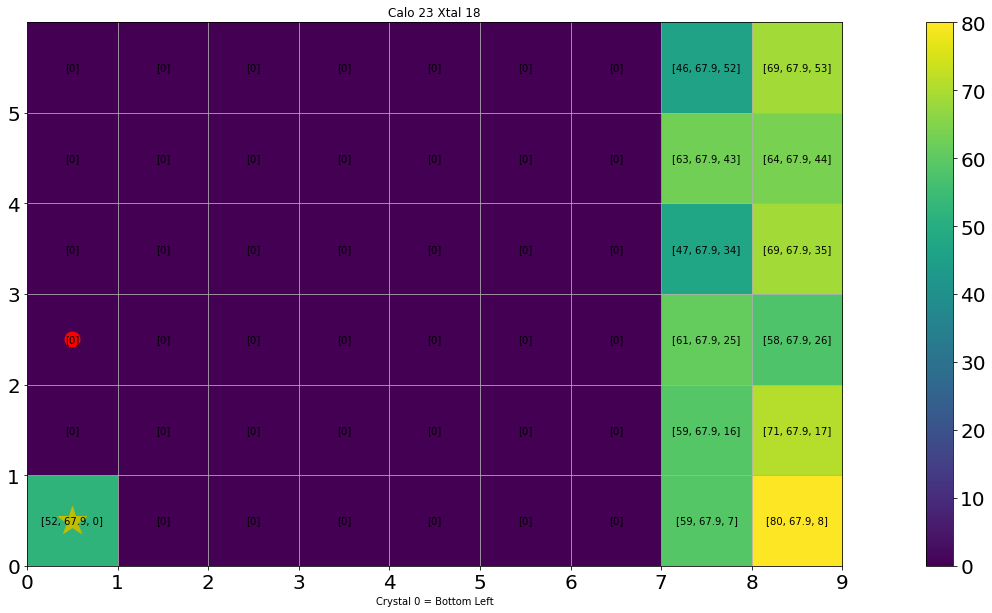

Crystal 20 with gain setting 79 , bias voltage 68.2 on board 3
67.9 999999 0 52 67.9
      optimum crystal (lowest gain): [0, 52, 67.9, 1]
      change in bias voltage: 0.3


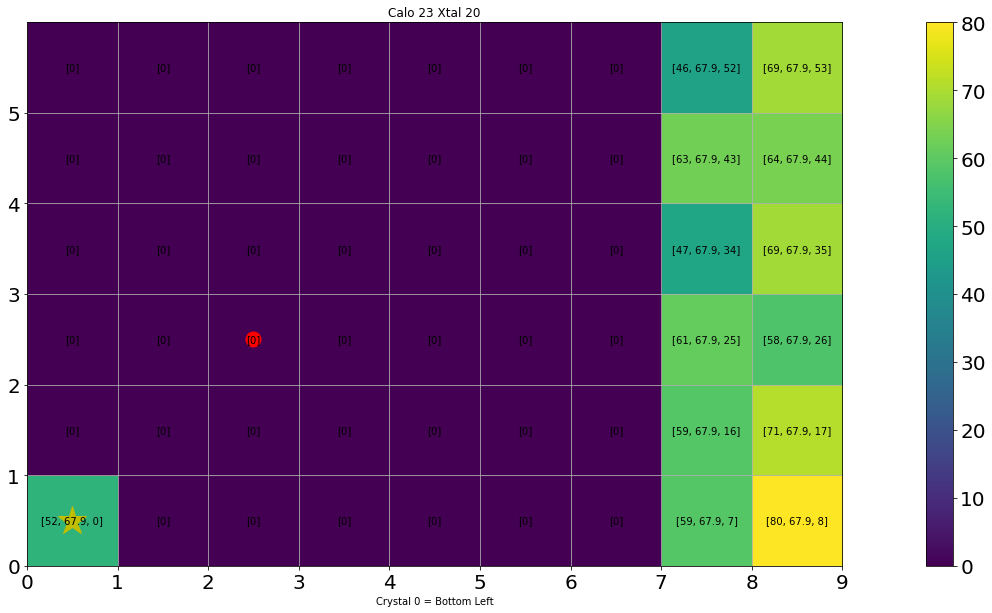

Crystal 30 with gain setting 80 , bias voltage 68.2 on board 2
67.9 999999 0 52 67.9
      optimum crystal (lowest gain): [0, 52, 67.9, 1]
      change in bias voltage: 0.3


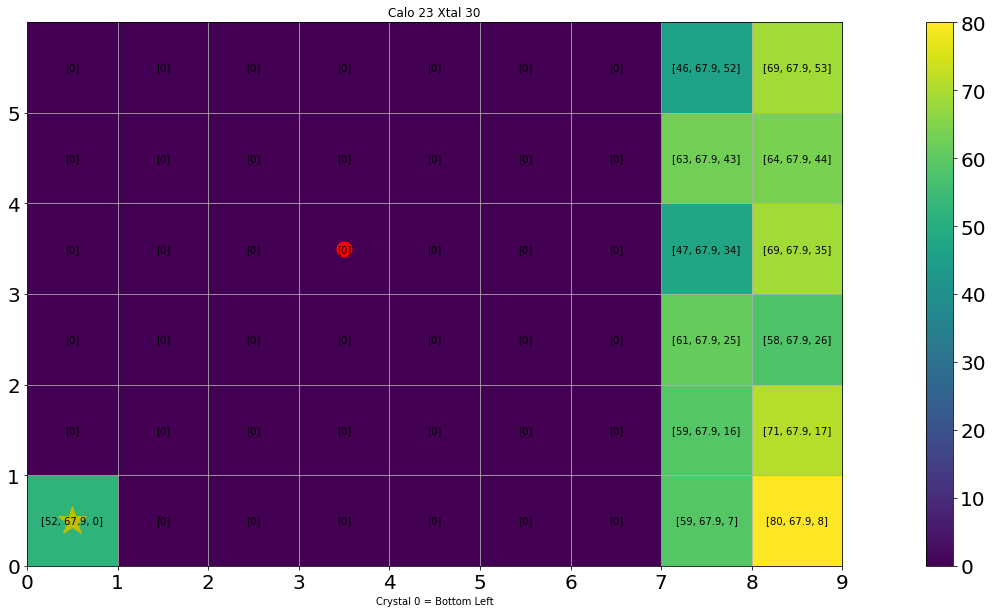

Crystal 45 with gain setting 80 , bias voltage 68.2 on board 4
67.9 999999 0 52 67.9
      optimum crystal (lowest gain): [0, 52, 67.9, 1]
      change in bias voltage: 0.3


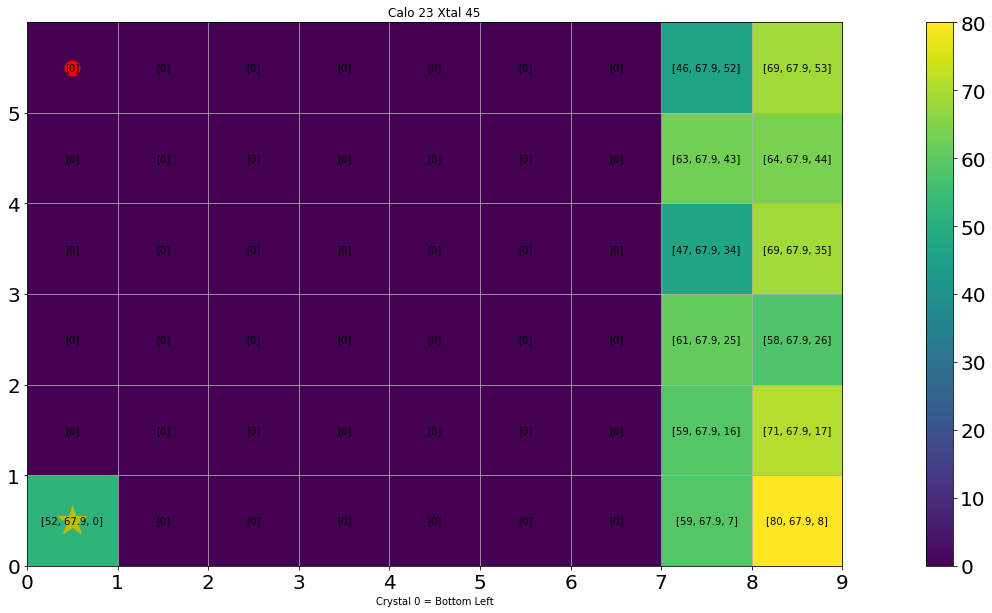

Crystal 46 with gain setting 77 , bias voltage 68.2 on board 3
67.9 999999 0 52 67.9
      optimum crystal (lowest gain): [0, 52, 67.9, 1]
      change in bias voltage: 0.3


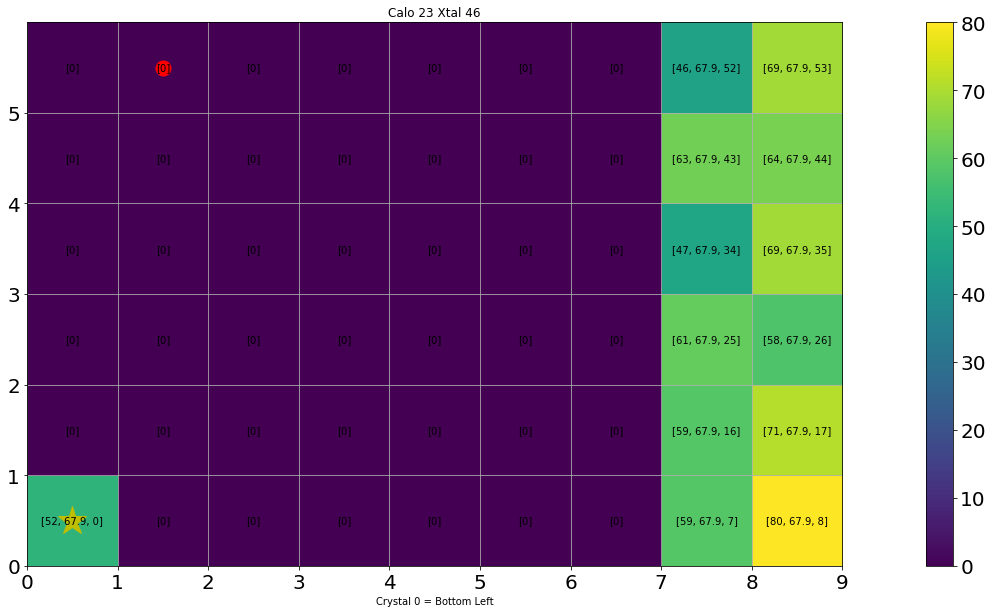

Crystal 3 with gain setting 80 , bias voltage 68.2 on board 2
68.1 999999 0 70 68.1
68.1 68.1 1 60 68.1
68.1 68.1 11 45 68.1
      optimum crystal (lowest gain): [11, 45, 68.1, 3]
      change in bias voltage: 0.1


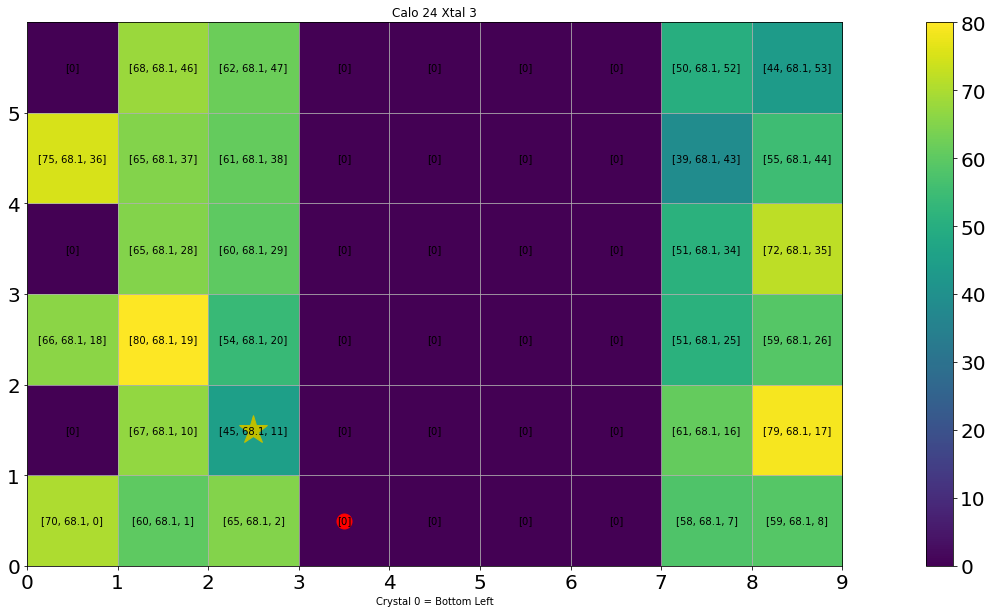

Crystal 19 with gain setting 80 , bias voltage 68.1 on board 3
      unable to optimize
Crystal 45 with gain setting 76 , bias voltage 68.2 on board 4
68.1 999999 0 70 68.1
68.1 68.1 18 66 68.1
      optimum crystal (lowest gain): [18, 66, 68.1, 3]
      change in bias voltage: 0.1


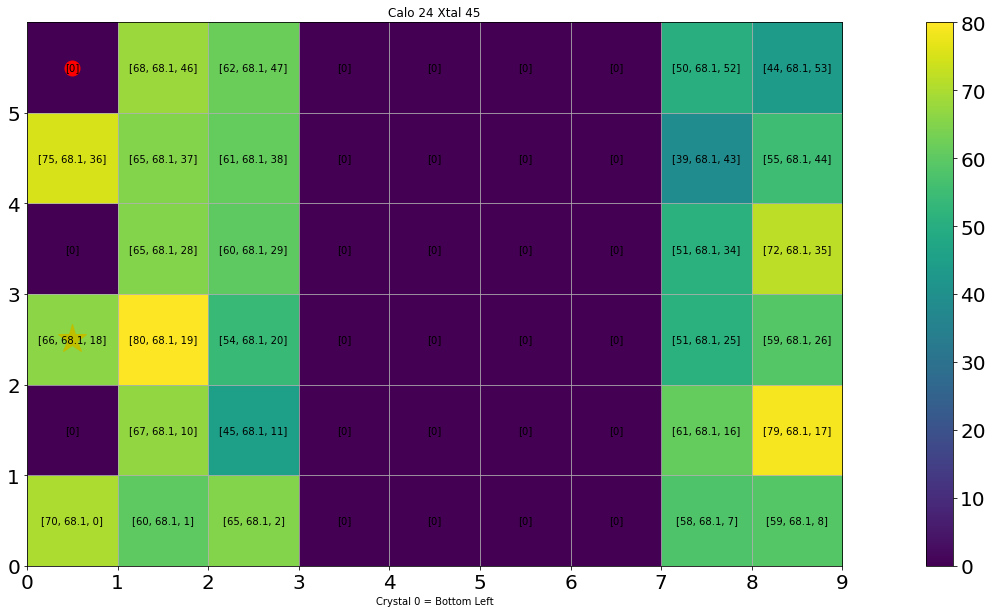

In [37]:
for calo, xtal, slope in whichXtals:
    findSwap(calo, xtal, "Down")

[<Figure size 720x432 with 2 Axes>, <matplotlib.axes._subplots.AxesSubplot object at 0x7f5980ad4320>]


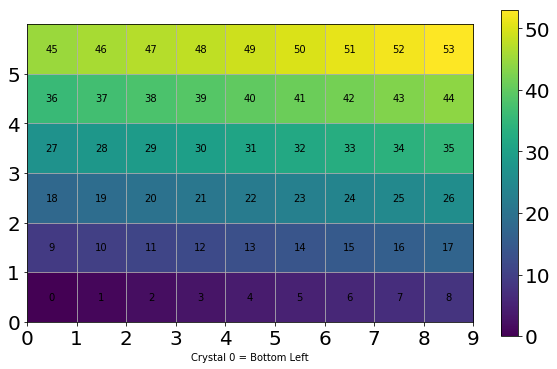

In [8]:
ding = PlotCrystals([x for x in range(54)])
print(ding)
plt.show()